Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


In [ ]:
main_data_dir = "/content/drive/MyDrive/dataset newfinal/Segmented Medicinal Leaf Images"

batch_size = 32
num_classes = len(os.listdir(main_data_dir))
epochs = 10

In [ ]:
print(num_classes)

30


In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

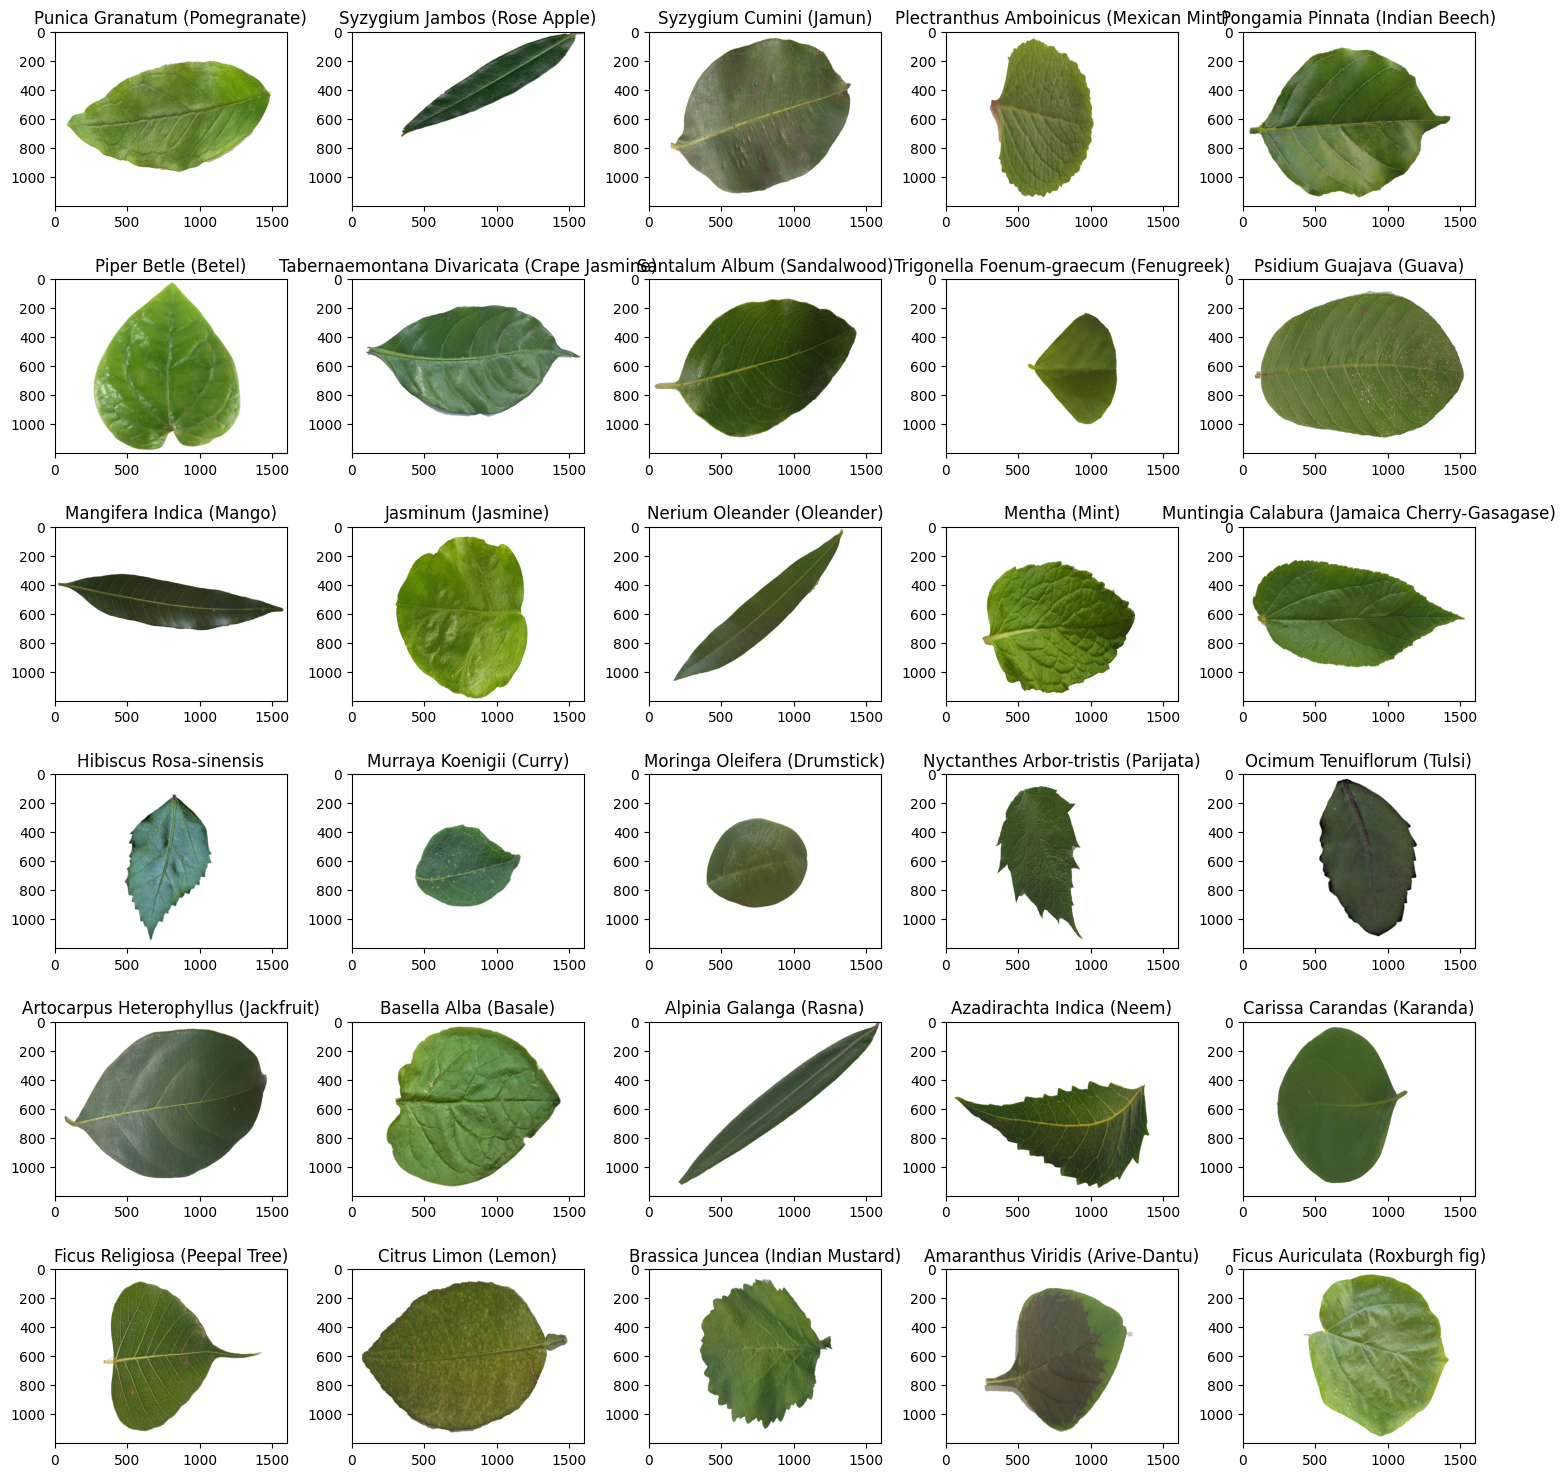

In [ ]:
class_folders = os.listdir(main_data_dir)
images_per_row = 5
num_rows = math.ceil(len(class_folders) / images_per_row)
fig, axs = plt.subplots(num_rows, images_per_row, figsize=(15, 15))
for i, class_folder in enumerate(class_folders):
   class_folder_path = os.path.join(main_data_dir, class_folder)
   image_files = [f for f in os.listdir(class_folder_path) if f.endswith('.jpg')]
   if image_files:
    first_image_path = os.path.join(class_folder_path, image_files[0])
    img = mpimg.imread(first_image_path)
    row = i // images_per_row
    col = i % images_per_row
    axs[row, col].imshow(img)
    axs[row, col].set_title(class_folder)
    axs[row, col].axis('on')
plt.tight_layout()
plt.show()


In [ ]:
split_ratio = 0.8
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=1 - split_ratio
)

In [ ]:

#  training data using the generator
train_generator = train_datagen.flow_from_directory(
    main_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# validation data using the generator
validation_generator = train_datagen.flow_from_directory(
    main_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1485 images belonging to 30 classes.
Found 350 images belonging to 30 classes.


In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

**MobileNetV2 Model**

In [ ]:
# Load MobileNetV2 base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

9406464/9406464 [==============================] - 0s 0us/step


Epoch 1/10
46/46 [==============================] - 743s 16s/step - loss: 1.8041 - accuracy: 0.4825 - val_loss: 0.6821 - val_accuracy: 0.8188
Epoch 2/10
46/46 [==============================] - 130s 3s/step - loss: 0.6354 - accuracy: 0.8128 - val_loss: 0.3830 - val_accuracy: 0.8906
Epoch 3/10
46/46 [==============================] - 108s 2s/step - loss: 0.3789 - accuracy: 0.8823 - val_loss: 0.2751 - val_accuracy: 0.9219
Epoch 4/10
46/46 [==============================] - 107s 2s/step - loss: 0.3227 - accuracy: 0.8968 - val_loss: 0.2665 - val_accuracy: 0.9281
Epoch 5/10
46/46 [==============================] - 109s 2s/step - loss: 0.2566 - accuracy: 0.9209 - val_loss: 0.2726 - val_accuracy: 0.9156
Epoch 6/10
46/46 [==============================] - 108s 2s/step - loss: 0.2448 - accuracy: 0.9153 - val_loss: 0.1851 - val_accuracy: 0.9375
Epoch 7/10
46/46 [==============================] - 107s 2s/step - loss: 0.1939 - accuracy: 0.9374 - val_loss: 0.2487 - val_accuracy: 0.9031
Epoch 8/10
4

In [ ]:
model.save('plant_identification_model2.h5')
# model_two.save('Inception_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
label_mapping = {i: label for i, label in enumerate(sorted(os.listdir(main_data_dir)))}

In [ ]:
label_mapping

{0: 'Alpinia Galanga (Rasna)',
 1: 'Amaranthus Viridis (Arive-Dantu)',
 2: 'Artocarpus Heterophyllus (Jackfruit)',
 3: 'Azadirachta Indica (Neem)',
 4: 'Basella Alba (Basale)',
 5: 'Brassica Juncea (Indian Mustard)',
 6: 'Carissa Carandas (Karanda)',
 7: 'Citrus Limon (Lemon)',
 8: 'Ficus Auriculata (Roxburgh fig)',
 9: 'Ficus Religiosa (Peepal Tree)',
 10: 'Hibiscus Rosa-sinensis',
 11: 'Jasminum (Jasmine)',
 12: 'Mangifera Indica (Mango)',
 13: 'Mentha (Mint)',
 14: 'Moringa Oleifera (Drumstick)',
 15: 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 16: 'Murraya Koenigii (Curry)',
 17: 'Nerium Oleander (Oleander)',
 18: 'Nyctanthes Arbor-tristis (Parijata)',
 19: 'Ocimum Tenuiflorum (Tulsi)',
 20: 'Piper Betle (Betel)',
 21: 'Plectranthus Amboinicus (Mexican Mint)',
 22: 'Pongamia Pinnata (Indian Beech)',
 23: 'Psidium Guajava (Guava)',
 24: 'Punica Granatum (Pomegranate)',
 25: 'Santalum Album (Sandalwood)',
 26: 'Syzygium Cumini (Jamun)',
 27: 'Syzygium Jambos (Rose Apple)',
 28: 

In [ ]:
image_path = '/content/drive/MyDrive/dataset newfinal/Segmented Medicinal Leaf Images/Trigonella Foenum-graecum (Fenugreek)/TF-S-002.jpg'

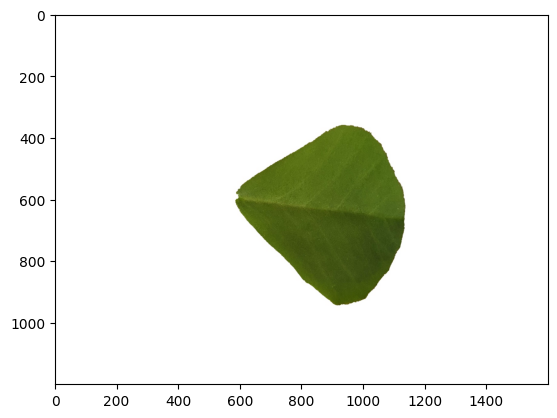

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib.request



# Load and display the image
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('on')
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
#if(coonfidene>=0.2):
#Load the trained model
model = tf.keras.models.load_model('plant_identification_model2.h5')

# Load and preprocess the image
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    preprocessed_image = preprocess_input(image_array)
    return preprocessed_image

# Perform prediction
def predict_plant(image_path, label_mapping):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)

    predicted_label_index = np.argmax(predictions)
    predicted_label = label_mapping[predicted_label_index]
    confidence = predictions[0][predicted_label_index]

    return predicted_label, confidence


predicted_label, confidence = predict_plant(image_path, label_mapping)

#  prediction
print(f"Predicted Label: {predicted_label}")
#print(f"Confidence: {confidence:.2f}")
print(f"Confidence: {confidence:.2f}")

1/1 [==============================] - 1s 1s/step
Predicted Label: Trigonella Foenum-graecum (Fenugreek)
Confidence: 0.75


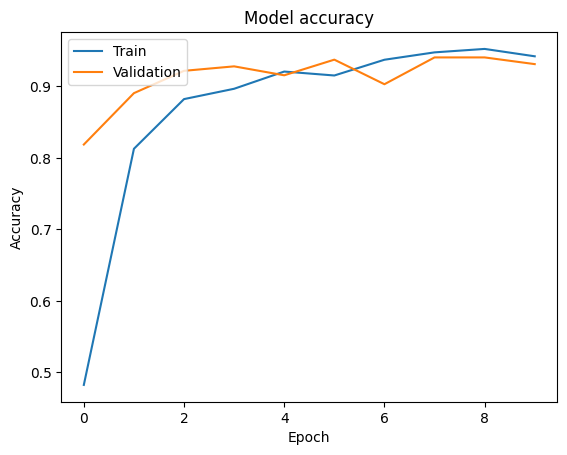

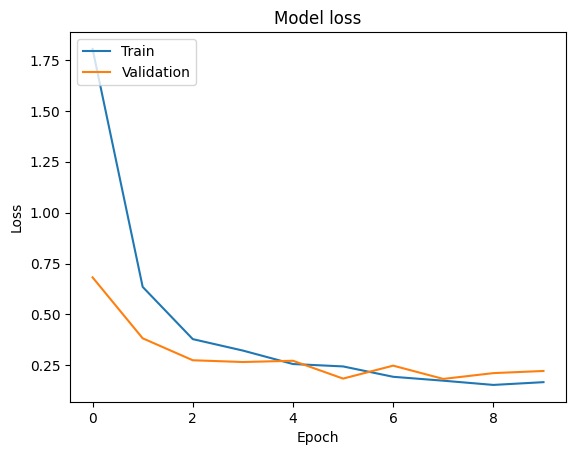

In [ ]:
# xc Results and Evaluation
# Training and Validation Curves
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
